In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42)
from sklearn.metrics import mean_squared_error, r2_score


In [101]:
df=pd.read_csv("C:/Users/dimpu/Downloads/archive (2)/Walmart_Store_sales.csv")

In [102]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [103]:
df.tail(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [105]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          2565 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [107]:
df.isnull().sum()

Store              0
Date            3870
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
dtype: int64

In [108]:
df["Date"] = df["Date"].fillna(method="ffill")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)

C:\Users\dimpu\AppData\Local\Temp\ipykernel_12308\968633184.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Date"] = df["Date"].fillna(method="ffill")


In [109]:
df['Holiday_Flag'] = df['Holiday_Flag'].astype(bool)
df['Store'] = df['Store'].astype('category')

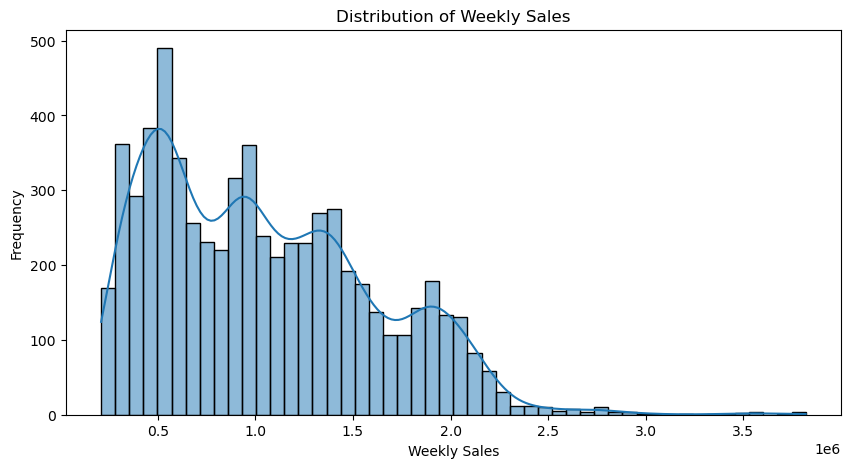

In [110]:
plt.figure(figsize=(10,5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


C:\Users\dimpu\AppData\Local\Temp\ipykernel_12308\1679009760.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')


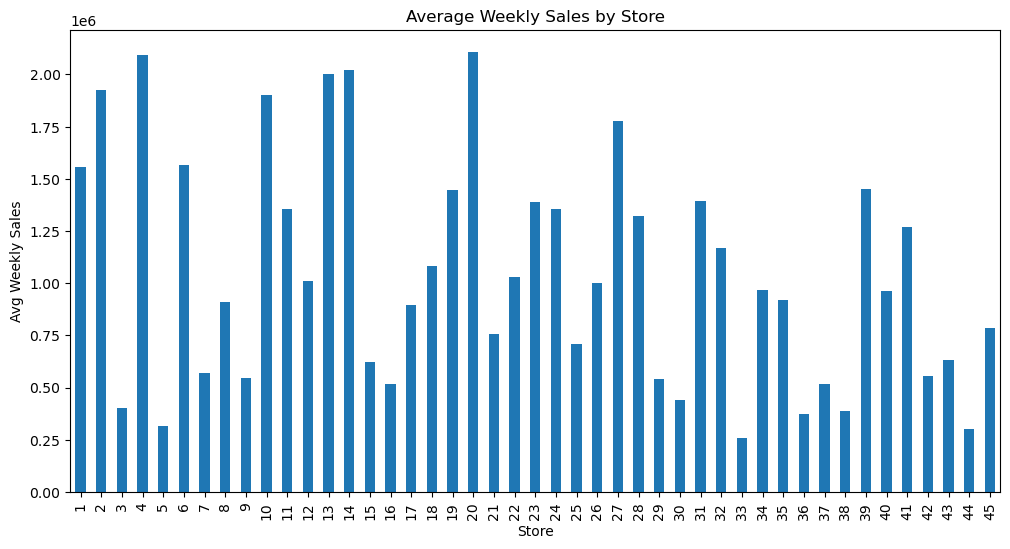

In [111]:
plt.figure(figsize=(12,6))
df.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')
plt.title("Average Weekly Sales by Store")
plt.xlabel("Store")
plt.ylabel("Avg Weekly Sales")
plt.show()


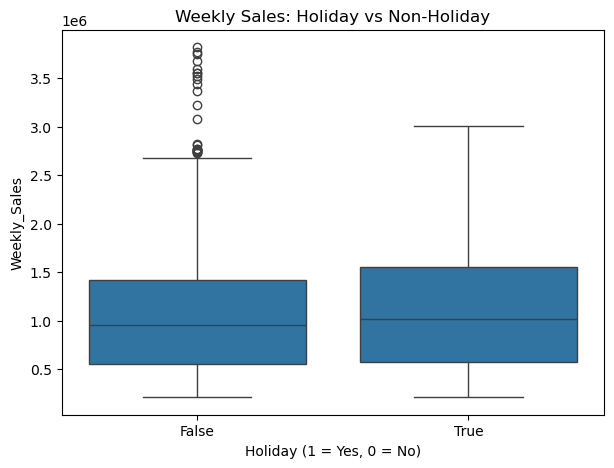

In [112]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday (1 = Yes, 0 = No)")
plt.show()


C:\Users\dimpu\AppData\Local\Temp\ipykernel_12308\3269303274.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')


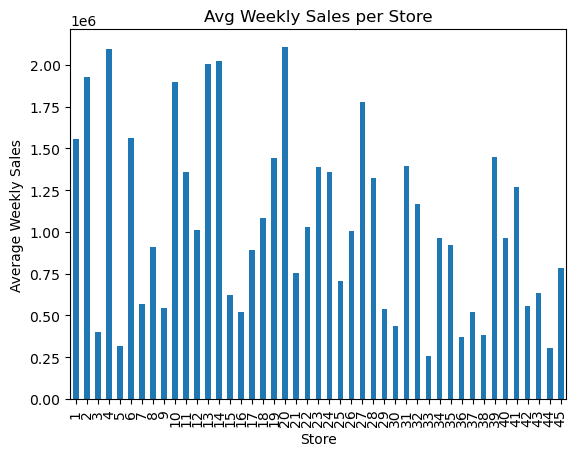

In [113]:
df.groupby('Store')['Weekly_Sales'].mean().plot(kind='bar')
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.title("Avg Weekly Sales per Store")
plt.show()


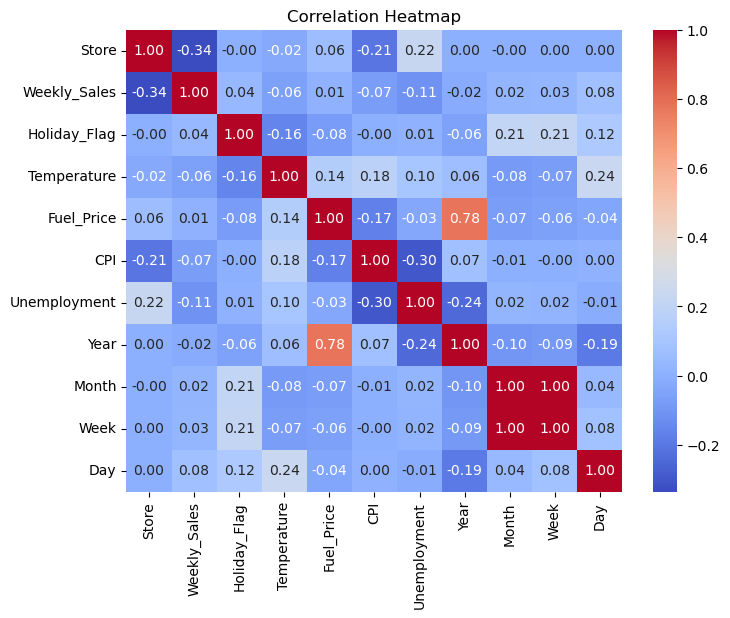

In [114]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [115]:
df.corr()['Weekly_Sales'].sort_values()


Store          -0.335332
Unemployment   -0.106176
CPI            -0.072634
Temperature    -0.063810
Year           -0.018378
Fuel_Price      0.009464
Month           0.021674
Week            0.025091
Holiday_Flag    0.036891
Day             0.076143
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64

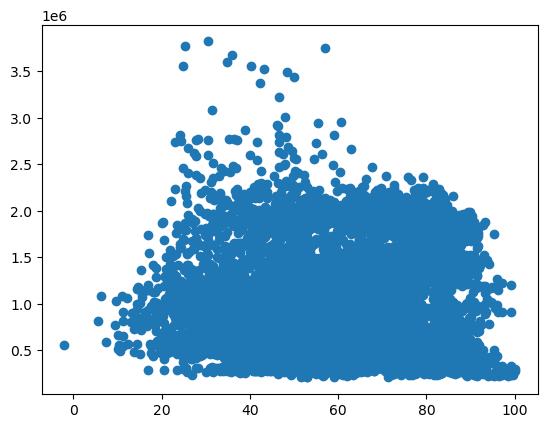

In [116]:
plt.scatter(df['Temperature'], df['Weekly_Sales'])


In [117]:
df["Lag_1"] = df["Weekly_Sales"].shift(1)
df["Lag_2"] = df["Weekly_Sales"].shift(2)
df["Lag_3"] = df["Weekly_Sales"].shift(3)


In [118]:
df["Rolling_3"] = df["Weekly_Sales"].rolling(3).mean()
df["Rolling_5"] = df["Weekly_Sales"].rolling(5).mean()


In [119]:
store_avg = df.groupby("Store")["Weekly_Sales"].mean()
df["Store_Avg_Sales"] = df["Store"].map(store_avg)

C:\Users\dimpu\AppData\Local\Temp\ipykernel_12308\3078935540.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_avg = df.groupby("Store")["Weekly_Sales"].mean()


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Store            6435 non-null   category
 1   Weekly_Sales     6435 non-null   float64 
 2   Holiday_Flag     6435 non-null   bool    
 3   Temperature      6435 non-null   float64 
 4   Fuel_Price       6435 non-null   float64 
 5   CPI              6435 non-null   float64 
 6   Unemployment     6435 non-null   float64 
 7   Year             6435 non-null   int32   
 8   Month            6435 non-null   int32   
 9   Week             6435 non-null   UInt32  
 10  Day              6435 non-null   int32   
 11  Lag_1            6434 non-null   float64 
 12  Lag_2            6433 non-null   float64 
 13  Lag_3            6432 non-null   float64 
 14  Rolling_3        6433 non-null   float64 
 15  Rolling_5        6431 non-null   float64 
 16  Store_Avg_Sales  6435 non-null   category


In [121]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df['Season'] = df['Month'].apply(get_season)
df['Season'] = df['Season'].astype('category').cat.codes




In [122]:
print(df['Season'].unique())
print(df['Season'].dtype)


[1 3 0 2]
int8


In [126]:
X = df[["Store","Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment",
        "Year","Month","Week","Day","Lag_1","Lag_2","Lag_3","Rolling_3",
        "Rolling_5","Season"]]

In [127]:
y = df["Weekly_Sales"]

In [128]:
df["Store"] = df["Store"].astype(int)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [130]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [132]:
y_pred = model.predict(X_test)

In [133]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 59525.80332179056
R² Score: 0.9890011762982995


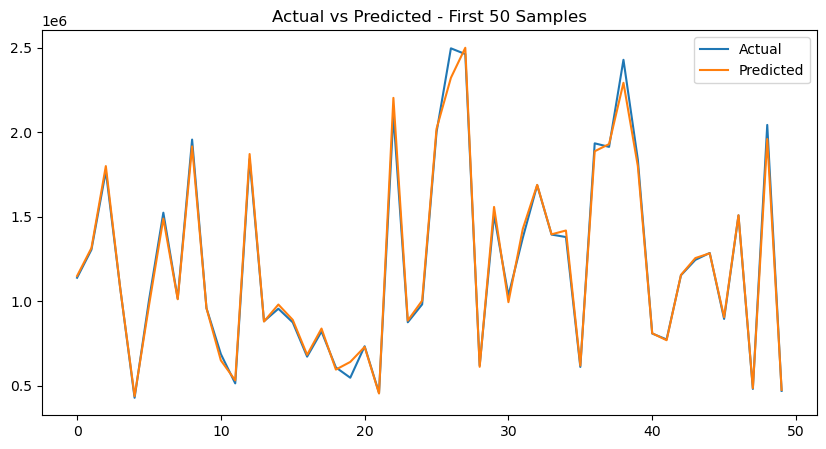

In [134]:

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Actual")
plt.plot(y_pred[:50], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted - First 50 Samples")
plt.show()